In [1]:
from google.colab import drive
import os

drive.mount("/content/drive")
path = "/content/drive/My Drive/Face_mark/"
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow 
import keras
import numpy as np 
import cv2
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
import pickle

from sklearn.preprocessing import LabelEncoder

In [3]:
def save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj,f)

def load_pickle(file_path):
  with open(file_path,'rb') as f:
    obj = pickle.load(f)
  return obj

In [4]:
IMG_SIZE = (224,224)
IMG_SHAPE = (224,224,3)

In [5]:
# data = []
# labels = []
# n=0
# for file in os.listdir(path +'Dataset/'):
#   for img in os.listdir(path +'Dataset/'+file):
#     try:
#       image= cv2.imread(path +'Dataset/'+file+'/'+img)
#       blob = cv2.dnn.blobFromImage(image, 1.0, IMG_SIZE, [104, 117, 123], False, False)

#       data.append(blob)
#       labels.append(file)
#       print(n)
#       n+=1
#     except:
#       print('error')
#       continue

In [6]:
data = load_pickle('data_blob.pkl')
labels = load_pickle('labels_blob.pkl')

nlabels = []

for l in labels:
  if l == 'with_mask':
    nlabels.append(0)
  else:
    nlabels.append(1)

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data,nlabels,test_size=0.2)
Xtrain = np.asarray(Xtrain)
Xtest = np.array(Xtest)
ytrain = np.asarray(ytrain)
ytest = np.asarray(ytest)

# encoder =  LabelEncoder()
# encoder.fit(labels)
# nytrain = encoder.transform(ytrain)
# nytest = encoder.transform(ytest)

In [8]:
# inter_train = int( len(Xtrain)/64 )
# inter_val = int(len(Xtest)/64)
# def generate(X,y,inter):
#   while True:
#     for i in range(inter):
#       X1,y1 = [],[]
#       for j in range(64):
#         X1.append(X[64*i + j])
#         y1.append(y[64*i + j])
#       X1 = np.array(X1, dtype='float32') /255.0
#       y1 = np.array(y1)
#       yield X1,y1

In [9]:
aug = ImageDataGenerator(
    rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
)

In [10]:
VGG_model = VGG16(
      include_top = False,
      weights='imagenet',
      input_shape = IMG_SHAPE
  )
model = Sequential()

for layer in VGG_model.layers:
  layer.trainable = False
  model.add(layer)

model.add(Flatten())
model.add(Dense(1024, activation='relu') )
model.add(Dense(512, activation='relu') )
model.add(Dense(2, activation='softmax') )


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = 'checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_best_only=True,
    verbose=1
)

In [13]:
# gen = generate(Xtrain,ytrain,inter_train)
# gen_val = generate(Xtest,ytest,inter_val)

In [14]:
model.fit(x =aug.flow(Xtrain,ytrain,batch_size=64),
          epochs=10,     
          validation_data=(Xtest,ytest),
          callbacks=[checkpoint])

Epoch 1/10
95/95 [==============================] - ETA: 0s - loss: 2.6897 - accuracy: 0.9462
Epoch 00001: val_loss improved from inf to 0.17812, saving model to checkpoints/
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoints/assets
95/95 [==============================] - 80s 846ms/step - loss: 2.6897 - accuracy: 0.9462 - val_loss: 0.1781 - val_accuracy: 0.9901
Epoch 2/10
95/95 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9775
Epoch 00002: val_loss improved from 0.17812 to 0.10671, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets
95/95 [==============================] - 78s 823ms/step - loss: 0.2487 - accuracy: 0.9775 - val_loss: 0.1067 - val_accuracy: 0.9914
Epoch 3/10
95/95 [======================

In [15]:
# model.fit(
#           Xtrain,
#           ytrain,
#           batch_size=128,
#           epochs=10,
#           validation_data=(Xtest,ytest),
#           callbacks=[checkpoint])

In [25]:
model.save('model_mask_9954.h5')

In [17]:
# model.load_weights('checkpoints/')

In [18]:
face = Xtest[110]

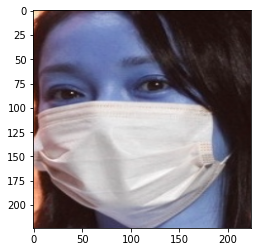

In [19]:
import matplotlib.pyplot as plt
plt.imshow(Xtest[110])

In [20]:
face = np.expand_dims(face,axis=0)

In [21]:
preds = model.predict(face)[0]
probs = model.predict_proba(face)[0]

Instructions for updating:
Please use `model.predict()` instead.


In [22]:
print(face.shape)

(1, 224, 224, 3)


In [23]:
ytest[110]

0

In [24]:
result = preds.argmax()
print(result)

0
